In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [5]:
train_score = reg.score(X_train, y_train)
print(f'R2 score (train): {train_score:.4f}')

test_score = reg.score(X_test, y_test)
print(f'R2 score (test): {test_score:.4f}')

R2 score (train): 0.9727
R2 score (test): 0.7980


In [6]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [10, 50, 100, 200, 500],
    'min_samples_leaf': np.arange(1, 6),
    'max_samples': np.arange(0.5, 1.0, 0.1),
    'max_features': ['sqrt', 'log2', None]    
}

search = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

print(search.best_params_)

{'n_estimators': 500, 'min_samples_leaf': 1, 'max_samples': 0.7999999999999999, 'max_features': 'log2'}


In [7]:
best_reg = search.best_estimator_
print(f'R2 score (train): {best_reg.score(X_train, y_train):.4f}')
print(f'R2 score (test): {best_reg.score(X_test, y_test):.4f}')

R2 score (train): 0.9636
R2 score (test): 0.8171


Feature importance

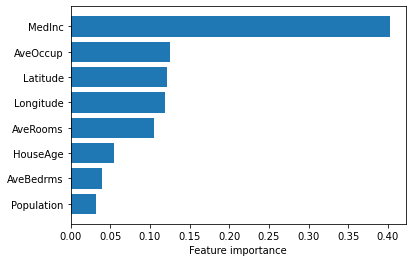

In [9]:
# Sort the features by their importance
feature_importance = best_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)

# Plot the feature importances
pos = np.arange(len(feature_importance))
plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Feature importance')

plt.savefig('figures/california_random_forest_feature_importance.pdf', bbox_inches='tight')